# Advanced plotting examples with Matplotlib

The following examples are taken from the examples section at [matplotlib.org](https://matplotlib.org/stable/gallery/index.html).

In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 100

## Demonstrate subplots and a signal processing task

This example is almost directly [from the Matplotib gallery](https://matplotlib.org/stable/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py).



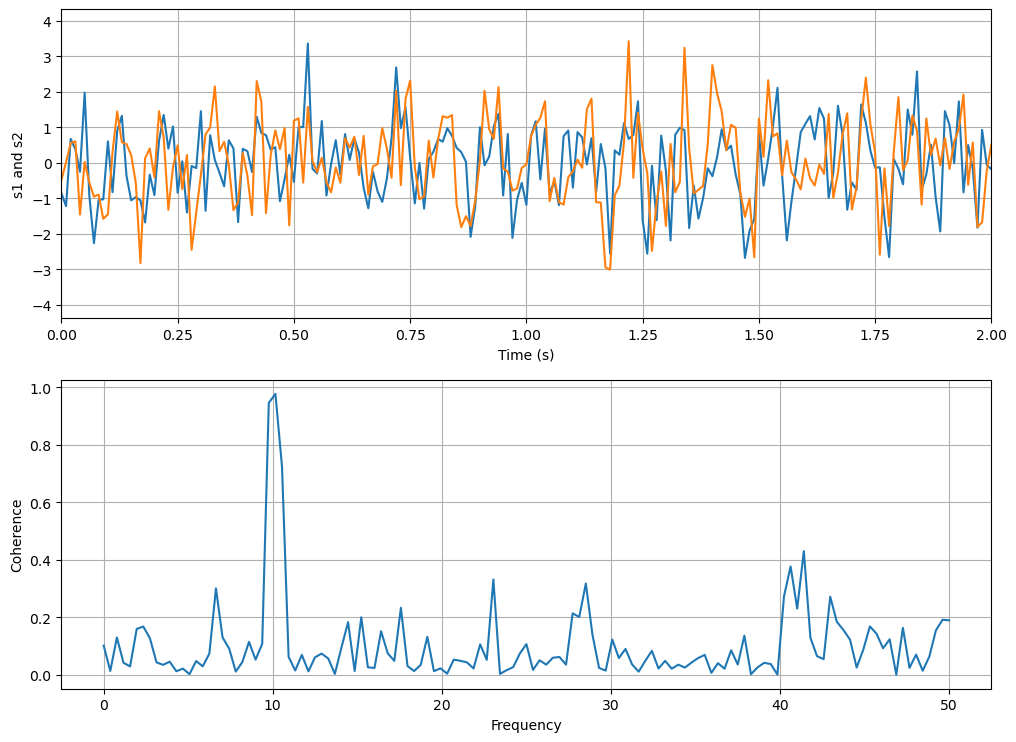

In [3]:
dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')

plt.show()

## Plot some bars of random sizes and colors in a polar chart

This example based on [polar_bar_demo.py](http://matplotlib.org/examples/pie_and_polar_charts/polar_bar_demo.html) from the above gallery.

First, we define the number of bars, make our $\theta$ coordinate, and generate random radii and widths:

In [4]:
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

Next we create a polar bar chart with our random variables. We also use a colormap to color-code the bars by radius. 

At the end, we ``show()`` the result.

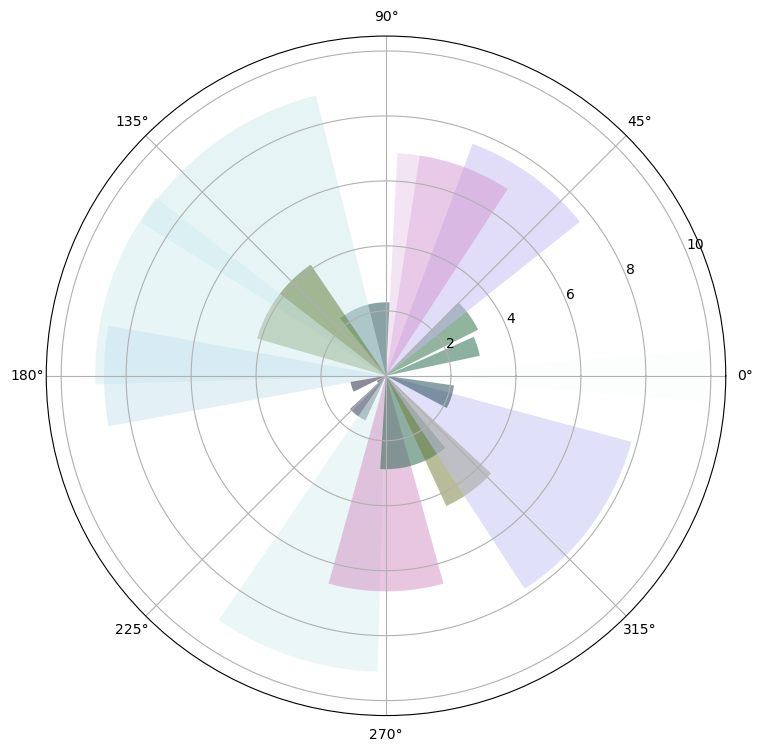

In [5]:
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.cubehelix(r / 10.))
    bar.set_alpha(0.5)

plt.show()

In [6]:
bars?

Type:        BarContainer
String form: <BarContainer object of 20 artists>
Length:      20
File:        /common/software/install/migrated/anaconda/python3-2020.07-mamba/lib/python3.8/site-packages/matplotlib/container.py
Docstring:  
Container for the artists of bar plots (e.g. created by `.Axes.bar`).

The container can be treated as a tuple of the *patches* themselves.
Additionally, you can access these and further parameters by the
attributes.

Attributes
----------
patches : list of :class:`~matplotlib.patches.Rectangle`
    The artists of the bars.

errorbar : None or :class:`~matplotlib.container.ErrorbarContainer`
    A container for the error bar artists if error bars are present.
    *None* otherwise.


In [7]:
plt.cm.

SyntaxError: invalid syntax (<ipython-input-7-c37929dd60af>, line 1)

A great site to learn more about Python and colormaps is https://colorcet.holoviz.org/

## Display a vector field

This example is based on [quiver_demo.py](http://matplotlib.org/examples/pylab_examples/quiver_demo.html)

Here we are going to work through just one of the plots from that page. This type of plot is called a "quiver" plot (because it is full of arrows), and is useful for indicating the direction information when displaying a vector field.

The U,V field we will be displaying is $(U,V) = (\cos(x) ,\sin(y) )$ on $[0,2\pi ]\times [0,2\pi]$

In [8]:
from numpy import meshgrid, arange, cos, sin, pi
X,Y = meshgrid( arange(0,2*pi,.2),arange(0,2*pi,.2) )
U = cos(X)
V = sin(Y)

In [9]:
Y

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4, ..., 0.4, 0.4, 0.4],
       ...,
       [5.8, 5.8, 5.8, ..., 5.8, 5.8, 5.8],
       [6. , 6. , 6. , ..., 6. , 6. , 6. ],
       [6.2, 6.2, 6.2, ..., 6.2, 6.2, 6.2]])

To reduce the number of arrows we plot a ``quiver`` of every third data point in our mesh.

``quiverkey`` lets us put a symbol marker label, and we can even use basic LaTeX notation.

We also make a normal plot on the same chart, using black dots, to indicate the actual location of each data point in our mesh.

Text(0.5, 1.0, "pivot='mid'; every third arrow; units='inches'")

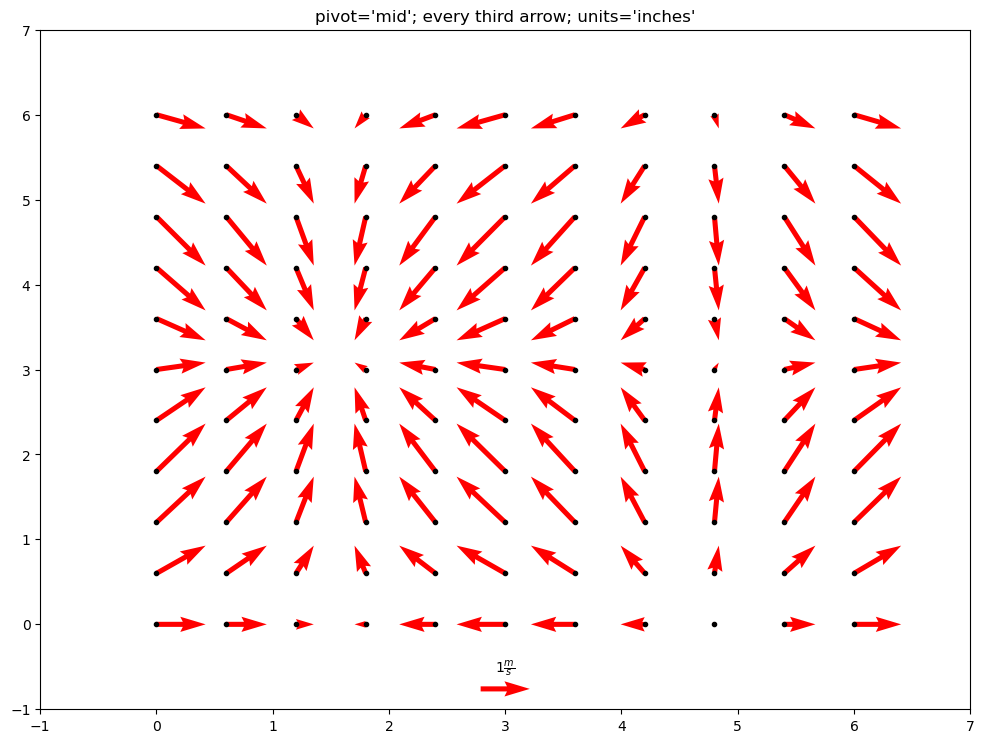

In [10]:
Q = plt.quiver( X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
            pivot='tail', color='r', units='inches' )
qk = plt.quiverkey(Q, 0.5, 0.03, 1, r'$1 \frac{m}{s}$', fontproperties={'size': 'medium'})
plt.plot( X[::3, ::3], Y[::3, ::3], 'k.')
plt.axis([-1, 7, -1, 7])
plt.title("pivot='mid'; every third arrow; units='inches'")